In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [14]:
def tentmap(a,fakt,N):
    eta1 = a * (2**(-0.5) - 0.5)
    meas = np.zeros((N*10,2))
    
    for i in range(N*10):
        if ((eta1 >= -a/2) and (eta1 < 0)):
            eta1 = (fakt * eta1 + 0.5 * a)
        else:
            eta1 = (-fakt * eta1 + 0.5 * a)
        meas[i] = [i, eta1]
    
    measerr = meas[::10,1]
    return measerr

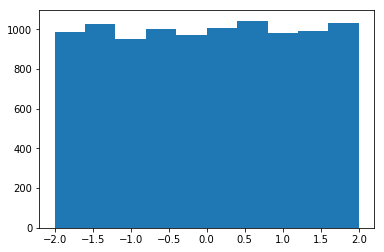

In [16]:
a = 4
fakt = 1.99999
N = 10**4

measerr = tentmap(a,fakt,N)

fig0 = plt.figure()
plt.hist(measerr)
plt.show()

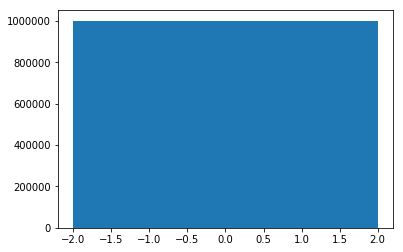

In [18]:
N = 10**7

measerr = tentmap(a,fakt,N)

fig1 = plt.figure()
plt.hist(measerr)
plt.show()

In [20]:
error = np.zeros((N/20))
j1 = 1

for i in range(N/20):
    error[i] = np.mean(measerr[j1:j1+20])
    j1 += 20

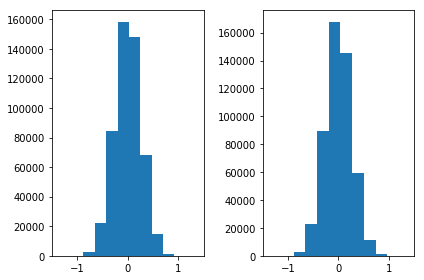

In [29]:
fig2 = plt.figure()
plt.subplot(1, 2, 1)
plt.hist(error)
plt.xlim(-1.5,1.5)

sim = np.sqrt(1./15) * np.random.randn(N/20)
plt.subplot(1, 2, 2)
plt.hist(sim)
plt.xlim(-1.5,1.5)

plt.tight_layout()
plt.show()

In [72]:
maxtau = 25
xi = measerr
C = np.zeros((maxtau, 2))

C[0] = 1.

j = 1
for tau in range(1,maxtau):
    xi1 = xi[tau:]
    xi2 = xi[:-tau]
    nn = xi**2
    cc = np.sum(xi1 * xi2) / np.sum(nn[:-tau])
    C[j] = [tau, cc]
    j += 1

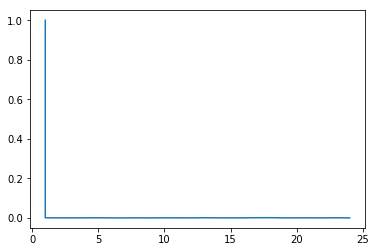

In [73]:
fig3 = plt.figure()
plt.plot(C[:,0],C[:,1])
plt.show()